In [54]:
import sklearn.datasets as datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

# Rでは，prcompのscale = Tで相関行列から主成分分析を行ったが，これはデータのスケーリングと同等なため，ここではデータのスケーリングを行っている．
scaler = StandardScaler()
scaler.fit(df) 
iris_scaled = scaler.transform(df)

In [55]:
pca = PCA(n_components =4).fit(iris_scaled)
PCscore = pca.transform(iris_scaled)
print(PCscore) 

[[-2.26470281e+00  4.80026597e-01 -1.27706022e-01 -2.41682039e-02]
 [-2.08096115e+00 -6.74133557e-01 -2.34608854e-01 -1.03006775e-01]
 [-2.36422905e+00 -3.41908024e-01  4.42014848e-02 -2.83770534e-02]
 [-2.29938422e+00 -5.97394508e-01  9.12901063e-02  6.59555596e-02]
 [-2.38984217e+00  6.46835383e-01  1.57381957e-02  3.59228133e-02]
 [-2.07563095e+00  1.48917752e+00  2.69682944e-02 -6.60818022e-03]
 [-2.44402884e+00  4.76441976e-02  3.35470401e-01  3.67755572e-02]
 [-2.23284716e+00  2.23148073e-01 -8.86954979e-02  2.46120962e-02]
 [-2.33464048e+00 -1.11532768e+00  1.45076864e-01  2.68592208e-02]
 [-2.18432817e+00 -4.69013561e-01 -2.53765567e-01  3.98992877e-02]
 [-2.16631010e+00  1.04369065e+00 -2.68681102e-01 -1.67313672e-02]
 [-2.32613087e+00  1.33078335e-01  9.37592444e-02  1.33483413e-01]
 [-2.21845090e+00 -7.28676165e-01 -2.30911237e-01 -2.42503814e-03]
 [-2.63310070e+00 -9.61506729e-01  1.80796084e-01  1.92155336e-02]
 [-2.19874060e+00  1.86005711e+00 -4.72900998e-01 -1.94731769e

In [56]:
# PCvectorに主成分（各主成分軸に対応する固有ベクトル）を入れる．
PCvector = pca.components_.T
print(PCvector) 

[[ 0.52106591  0.37741762 -0.71956635 -0.26128628]
 [-0.26934744  0.92329566  0.24438178  0.12350962]
 [ 0.5804131   0.02449161  0.14212637  0.80144925]
 [ 0.56485654  0.06694199  0.63427274 -0.52359713]]


In [57]:
# PCmeanに各次元で用いた平均値を入れる．
PCmean = pca.mean_
print(PCmean)

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [58]:
# PCcontriに寄与率を入れる．
PCcontri = pca.explained_variance_ratio_
print(PCcontri) 

[0.72962445 0.22850762 0.03668922 0.00517871]


In [59]:
# PCcumcontriに累積寄与率を入れる．
PCcumcontri = PCcontri.cumsum()
print(PCcumcontri) 

[0.72962445 0.95813207 0.99482129 1.        ]


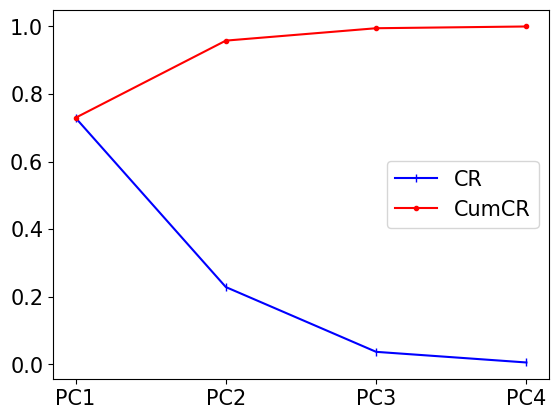

In [60]:
PCcontri = pd.DataFrame(pca.explained_variance_ratio_)
PCcumcontri = pd.DataFrame(PCcontri.cumsum())

PCcum_contri = pd.concat([PCcontri, PCcumcontri], axis = 1).T
PCcum_contri.index = ['PCcontri', 'PCcumcontri']
x_axis = range(1, PCcontri.shape[0] + 1)
plt.rcParams['font.size'] = 15
loc=[1, 2, 3, 4]
labels=['PC1', 'PC2', 'PC3', 'PC4']
plt.xticks(loc, labels)
plt.plot(x_axis, PCcontri.iloc[:, 0], 'b|-', label = 'CR')
plt.plot(x_axis, PCcumcontri.iloc[:, 0], 'r.-', label = 'CumCR')
plt.legend(loc = 'center right')
plt.show()